# Chargement des données

**Import**

In [1]:
# Import
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

**Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Téléchargement données test**

In [2]:
# Telechargement Fashion MNIST
train, test = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Organisation des données**

In [4]:
# Nom des classes
dict_labels = { 0: 'T-shirt/top',
              1: 'Trouser',
              2: 'Pullover',
              3: 'Dress',
              4: 'Coat',
              5: 'Sandal',
              6: 'Shirt',
              7: 'Sneaker',
              8: 'Bag',
              9: 'Ankle boot'}

In [5]:
x_test = test[0]
y_test = test[1]

In [6]:
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.uint8)

In [7]:
N_test  = x_test.shape[0]
print(f"Nb données test : {N_test}.")

Nb données test : 10000.


**Chargement du modèle entrainé**

In [10]:
path = "/content/drive/MyDrive/saved_model"

In [11]:
model = tf.keras.models.load_model(path)

**Fonctions**

In [13]:
def make_prediction(model, img):
  img = np.expand_dims(img,axis=2)
  img = np.expand_dims(img,axis=0)
  vec_pred = model.predict(img)
  return vec_pred

def onehot2lab(vec):
  idx = np.argmax(vec)
  return dict_labels[idx]

def normalise(img, label):
  mean = tf.reduce_mean(img)
  std = tf.math.reduce_std(img)
  out = (img - mean)/std
  return(out, label)

# Inférence

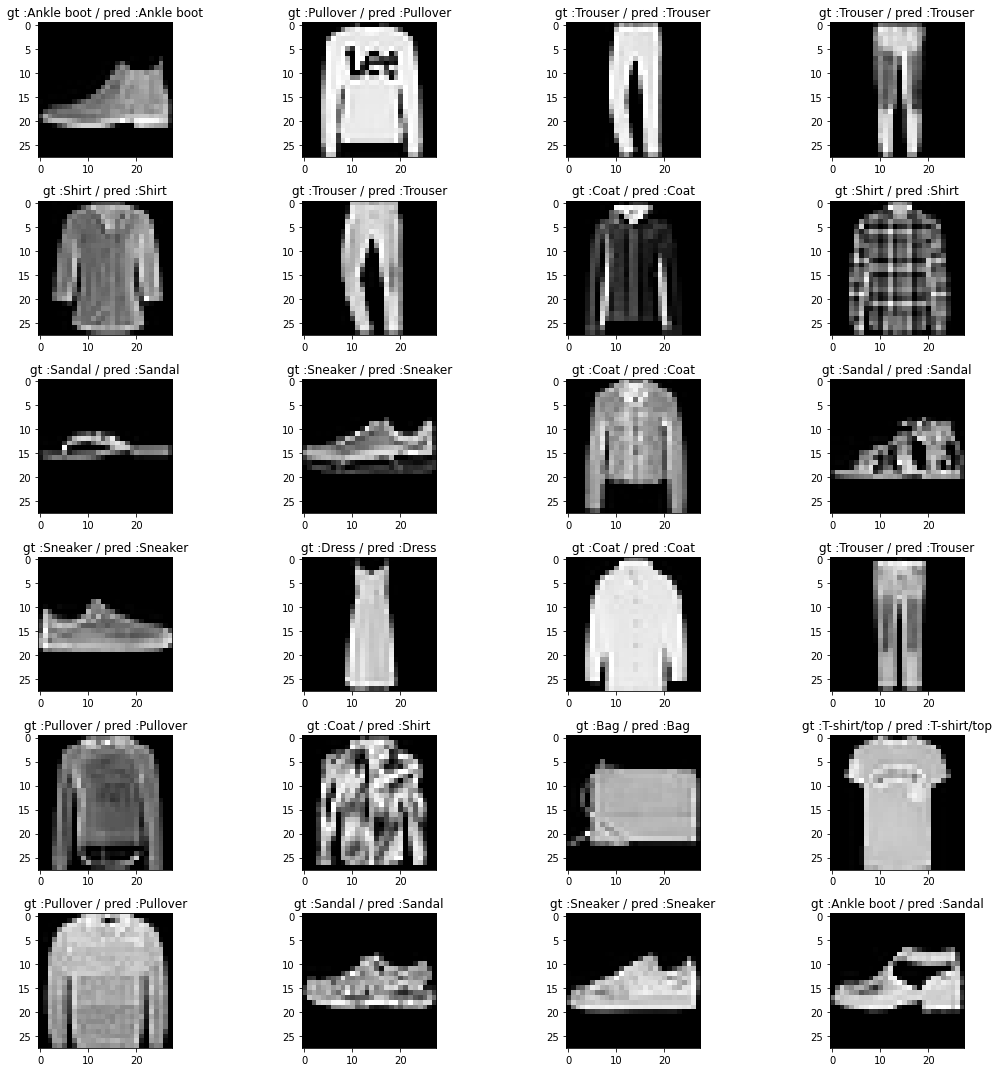

In [18]:
# Visualisation
fig = plt.figure(figsize=(15,15))
for k in range(24):
  # chargement
  img = x_test[k,:,:]
  label_num = y_test[k]
  # normalisation
  img, label_num = normalise(img,label_num)
  # prediction
  vec_label = make_prediction(model,img)
  pred_label = onehot2lab(vec_label)
  # affichage
  plt.subplot(6,4,k+1)
  plt.imshow(img,cmap='gray')
  plt.title(f"gt :{dict_labels[label_num]} / pred :{pred_label}")

fig.tight_layout()
plt.show()